In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv('tinder_google_play_reviews.csv')

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6882d0aa-da42-4840-bf2a-6577224376a1,SkyKrow,https://play-lh.googleusercontent.com/a-/AFdZu...,"App has way too many bots and scam profiles, e...",1,0,13.14.0,2022-08-13 03:07:45,NaN,NaN
1,e885d673-5106-41b7-9445-90a68c764b43,Niraj Jha,https://play-lh.googleusercontent.com/a-/AFdZu...,no free chat,1,0,13.13.0,2022-08-13 03:02:42,NaN,NaN
2,b6c7fa8a-7bff-4b7a-aa7b-60c32ea63cbb,T Ninja,https://play-lh.googleusercontent.com/a-/AFdZu...,🔥naaa,5,0,13.13.0,2022-08-13 02:54:13,NaN,NaN
3,20aa41da-ab41-4ee2-b249-c87f27a1cbfe,Jennifer Paczas,https://play-lh.googleusercontent.com/a-/AFdZu...,Each update makes this app worse. They removed...,1,0,13.14.0,2022-08-13 02:39:31,NaN,NaN
4,6e9bfa1d-d8d0-444c-860a-3d6231bd1829,Hunter Roach,https://play-lh.googleusercontent.com/a/AItbvm...,Fake accounts. Girls that are gold diggers,1,0,NaN,2022-08-13 02:21:32,NaN,NaN


In [4]:
data = df[['content']]  #for sentiment analysis we need only content column

In [5]:
data.isnull().sum() #checking if content column has any null values

content    1341
dtype: int64

In [6]:
data = data.dropna()   #dropping the null values

In [7]:
nltk.download('stopwords')   #natural language toolkit
stemmer = nltk.SnowballStemmer("english") #snowballstemmer is process of reducing word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. 
stopword=set(stopwords.words('english'))

#the stemmer requires language parameter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

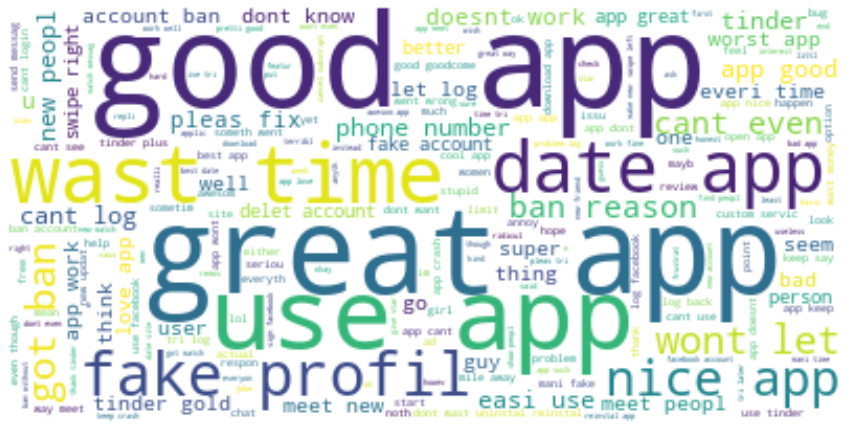

In [9]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
#adding three columns as positive,negative and neutral
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0  app way mani bot scam profil even verifi accou...     0.103     0.153   
1                                          free chat     0.767     0.000   
2                                              🔥naaa     0.000     0.000   
3  updat make app wors remov lot featur safeti re...     0.000     0.144   
4                      fake account girl gold digger     0.000     0.437   

   Neutral  
0    0.744  
1    0.233  
2    1.000  
3    0.856  
4    0.563  


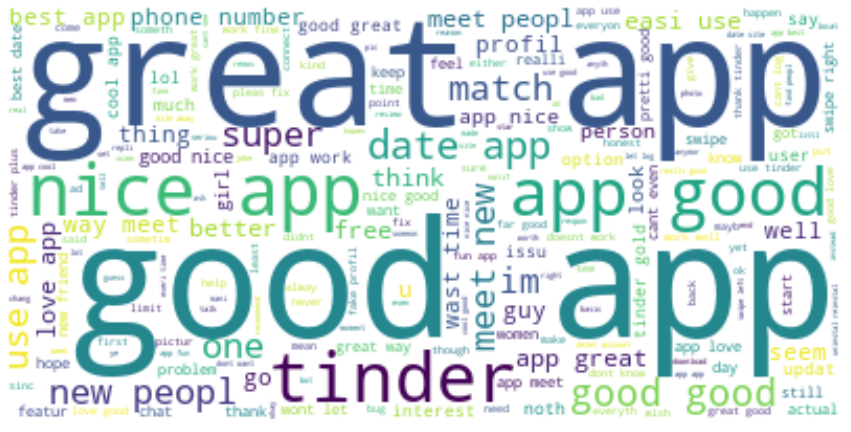

In [11]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

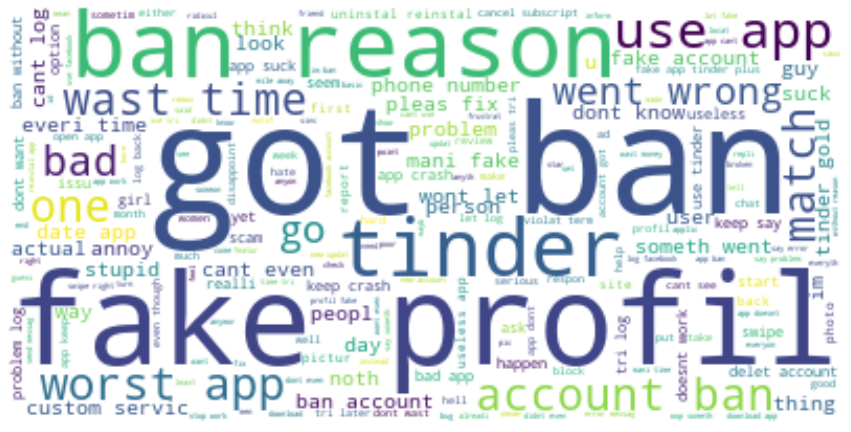

In [12]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [14]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  160592.27800002703
Negative:  61328.48499999936
Neutral:  320546.1759999683
